## House Rental Prediction

In [3]:
# Let's create a ML model to predict rent of house.
# Here is the data - Link
# Make sure you do data wrangling & get useful insights/visualizations
# Create models using Linear Regressions or variations of it
# Think harder about data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt", index_col='Unnamed: 0')

In [4]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [6]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

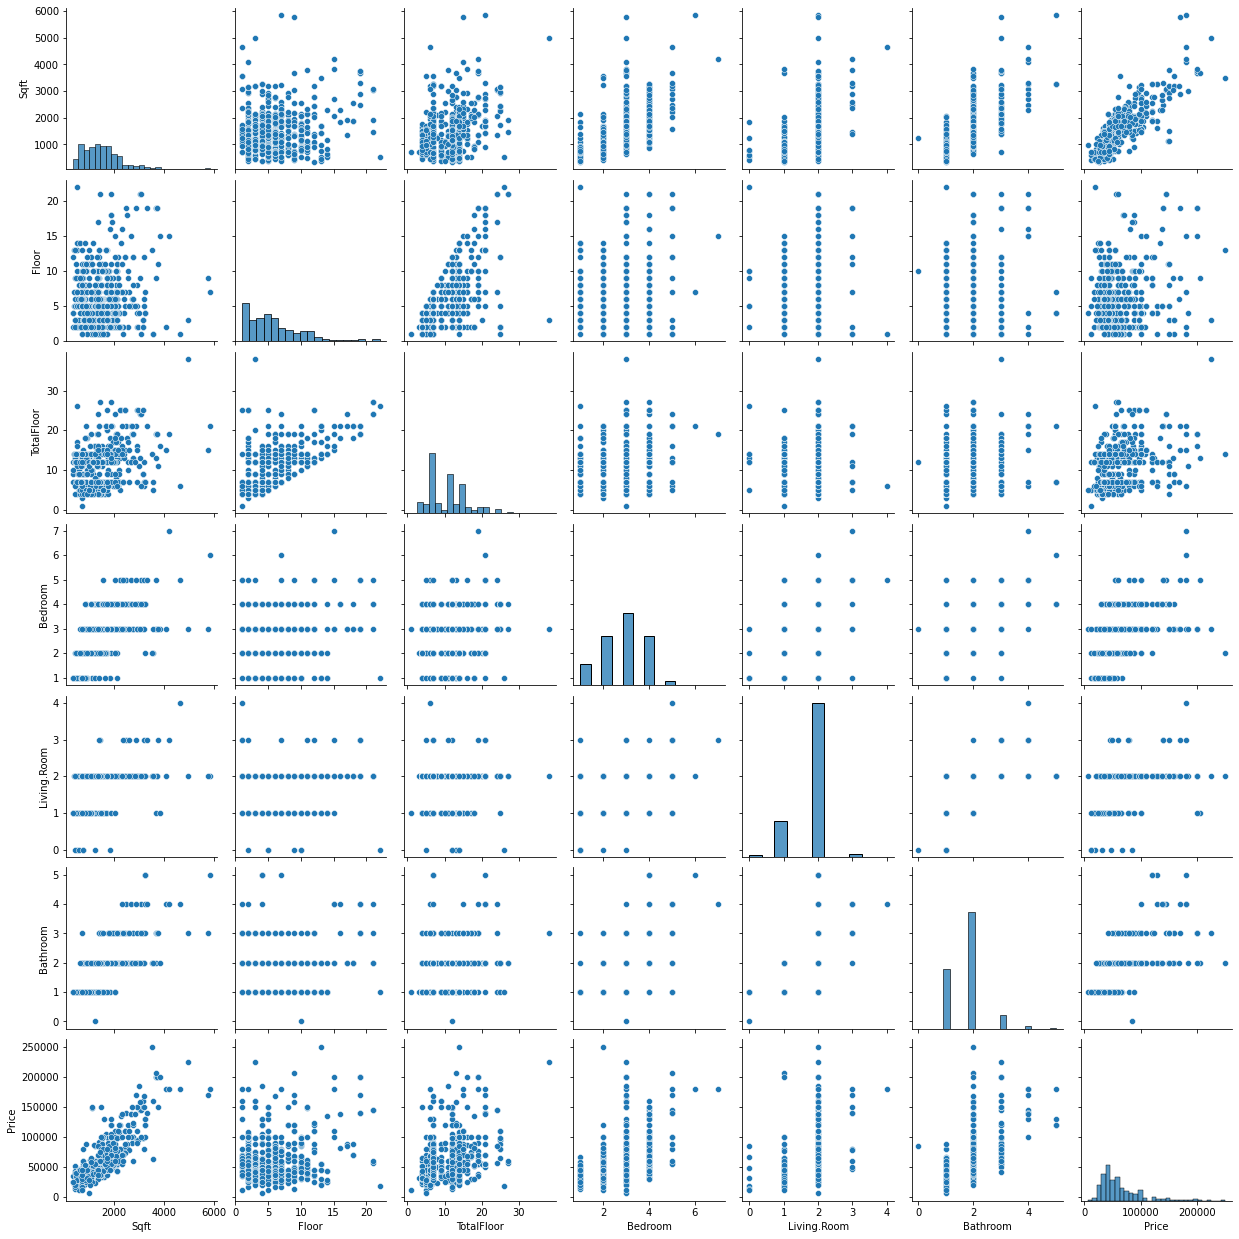

In [8]:
sns.pairplot(df)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sqft'>

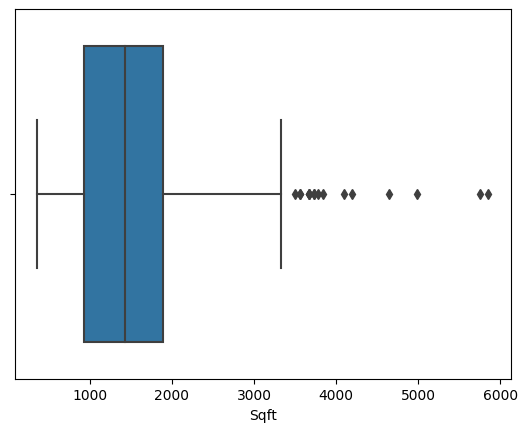

In [11]:
sns.boxplot("Sqft",data=df)

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

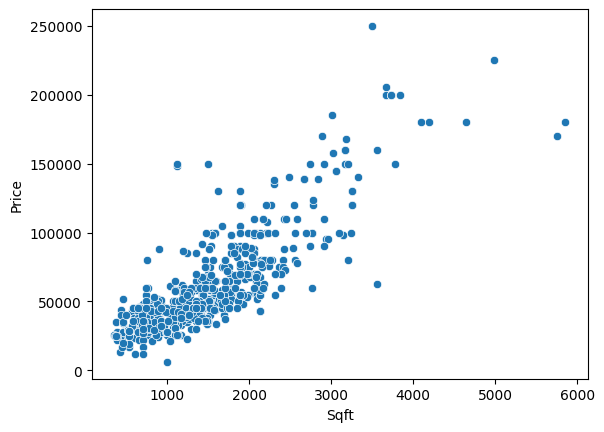

In [13]:
sns.scatterplot(x="Sqft",y="Price",data=df)

<AxesSubplot:>

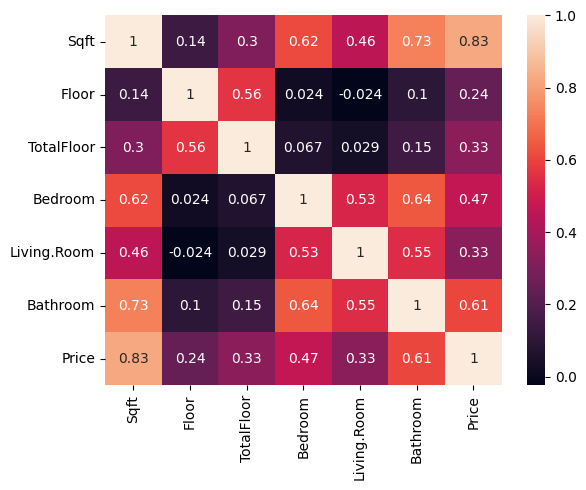

In [39]:
sns.heatmap(df.corr(),annot=True)

In [25]:
x = df.drop(["Price"],axis=1)
y= df["Price"]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X=x)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train

array([[0.35533981, 0.28571429, 0.37837838, 0.5       , 0.5       ,
        0.4       ],
       [0.12880259, 0.        , 0.13513514, 0.33333333, 0.5       ,
        0.4       ],
       [0.14174757, 0.0952381 , 0.2972973 , 0.33333333, 0.5       ,
        0.4       ],
       ...,
       [0.32686084, 0.52380952, 0.43243243, 0.33333333, 0.5       ,
        0.6       ],
       [0.17411003, 0.52380952, 0.2972973 , 0.33333333, 0.5       ,
        0.4       ],
       [0.12880259, 0.0952381 , 0.2972973 , 0.33333333, 0.5       ,
        0.2       ]])

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [34]:
lr.fit(x_train,y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [35]:
y_pred = lr.predict(x_test)

In [36]:
lr.score(x_test,y_test)

0.643120307288799

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 14958.929645345777
MSE: 407122681.84296685
RMSE: 20177.281329330937
